In [87]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment .util import *
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
nltk.download('stopwords')

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt

from dask.distributed import Client
import dask.dataframe as dd
import dask.array as da

import seaborn as sns
import matplotlib.ticker as ticker

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
client = Client()
client.restart()

C:\Users\steve\anaconda3\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54783 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:54786 Dashboard: http://127.0.0.1:54783/status,Cluster Workers: 4 Cores: 16 Memory: 34.22 GB


In [22]:
sid = SentimentIntensityAnalyzer()

In [43]:
df = dd.read_csv('tweet_out/2020-*-*.csv', blocksize = None, usecols = ['text'])
df

,text
npartitions=254,
,object
,...
...,...
,...
,...


In [51]:
def polar(data):
    data= sid.polarity_scores(data.text)['compound']
    return data
df['sentiment']=df.map_partitions(lambda x : x.apply(polar,axis=1), meta = ('float'))
# result = df.map_partitions(pol, meta = ('dict')).map_partitions(lambda x:x['compound'], meta = ('float')).map_partitions(np.mean)
# result.compute()
df.compute()

,text,sentiment
0,¿Usa internet Explorer o qué? https://t.co/jDy...,0.0000
1,RT @brfootball: BREAKING: AC Milan announce th...,0.5574
2,RT @WorldVisionLK: It's time to take care of e...,0.7845
3,RT @fahmirusliMFR: Ramai beri cadangan aktivit...,0.0000
4,"RT @jennycohn1: I can’t read minds, but Trump ...",-0.7351
...,...,...
3815,RT @DrEricDing: NEW—The coronavirus was in the...,0.0000
3816,RT @DonaldJTrumpJr: CNN FINALLY REALIZES CHINA...,-0.5160
3817,Coronavirus: believing in conspiracies goes ha...,0.6705
3818,RT @OH_mes2: April Naeun has tested negative f...,-0.5719


In [24]:
score = df.text.apply(pol, meta = ('dict')).apply(lambda x:x['compound'], meta = ('float'))


In [27]:
score=score.compute()

In [28]:
score

0       0.0000
1       0.5574
2       0.7845
3       0.0000
4      -0.7351
         ...  
3815    0.0000
3816   -0.5160
3817    0.6705
3818   -0.5719
3819   -0.1943
Length: 1627532, dtype: float64

In [30]:
len(date_list)

92

In [78]:
import datetime
start = datetime.datetime.strptime("2020-03-22", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-12-01", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
date_list = []
for date in date_generated:
    date_list.append(date.strftime("%Y-%m-%d"))


In [58]:
pol = sid.polarity_scores
score_list = []
for i in date_list:
    print(i)
    test_df = pd.read_csv('tweet_out/'+i+'.csv')
    score = test_df.text.apply(pol).apply(lambda x:x['compound']).mean()
    score_list.append(score)

2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-25
2020-04-26
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20

FileNotFoundError: [Errno 2] No such file or directory: 'tweet_out/2020-12-01.csv'

In [110]:
detrended = pd.read_csv('detrended_cases.csv')
detrended['0']/10000

0      -1.158800
1      -0.316700
2      -1.416800
3      -0.224886
4       1.439771
         ...    
249    -0.382029
250    20.839371
251     1.484026
252   -17.833414
253   -13.794854
Name: 0, Length: 254, dtype: float64

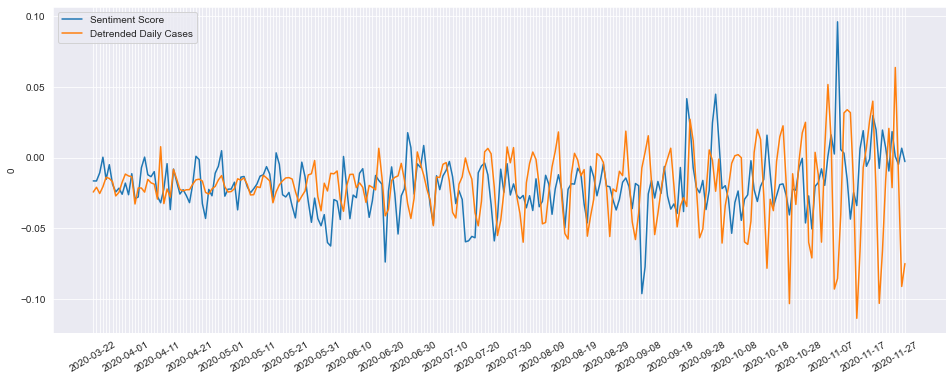

In [123]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))

ax = sns.lineplot(y = score_list, x = date_list, label = 'Sentiment Score')
ax2 = sns.lineplot(y = detrended['0']/2500000+np.mean(score_list), x = date_list, label = 'Detrended Daily Cases')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=30)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.legend()

In [72]:
len(score_list)

254

In [80]:
len(date_list)

254

In [ ]:
test_df = pd.read_csv('tweet_out/2020-05-01.csv')
test_df.text.apply(sid.polarity_scores).apply(lambda x:x['compound']).mean()